In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("medical_records.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
0,55.0,non-anaemitic,748,non-diabetic,45,not-present,263000.00,1.30,137,Male,No,88,10106,0.0
1,60.0,anaemitic,95,non-diabetic,60,not-present,337000.00,1.00,138,Male,Yes,146,10175,0.0
2,50.0,anaemitic,121,diabetic,40,not-present,260000.00,0.70,130,Male,No,175,10192,0.0
3,59.0,anaemitic,176,diabetic,25,not-present,221000.00,1.00,136,Male,Yes,150,10181,1.0
4,45.0,non-anaemitic,292,diabetic,35,not-present,850000.00,1.30,142,Male,Yes,88,10109,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,86.0,non-anaemitic,582,non-diabetic,38,not-present,263358.03,1.83,134,Female,No,95,10119,1.0
342,44.0,non-anaemitic,582,diabetic,30,present,263358.03,1.60,130,Male,Yes,244,10270,0.0
343,42.0,non-anaemitic,5209,non-diabetic,30,not-present,226000.00,1.00,140,Male,Yes,87,10103,0.0
344,60.0,non-anaemitic,235,diabetic,38,not-present,329000.00,3.00,142,Female,No,30,10039,1.0


In [3]:
for column in df:
  print(f"{column}:{df[column].unique()}")

age:[55.    60.    50.    59.    45.    79.    60.667 51.    81.    53.
 77.    62.    63.    75.    80.    65.    70.    46.    61.    40.
 43.    58.    85.    52.    72.    49.    57.    64.    82.    67.
 95.    73.    42.    68.    41.    78.    69.    44.    54.    48.
 90.    47.    87.    94.    66.    56.    86.   ]
anaemia:['non-anaemitic' 'anaemitic']
creatinine_phosphokinase:[ 748   95  121  176  292   55  369  318  151  582   47 1380 4540  207
  109  231  103  898  618  719 1896  571  308  115  125 7861  336   59
  129   60   84  281   52 2334  170  246  358  305  102  193 1548  166
  257 2261 3966  244 2522  328 2017  789  233   99   90  514  624  111
   93   62  291  379  835  130   97  212  298  161  213  607  737  981
  371  482   66  132  133   23   86   96  972   63  146 1876   69  577
   70  897  185  143  253  198  148  113 2656  196   64   56   57  315
  159  446  707  119  646  156   76  101 3964  110 1688  157  203   78
  572 2413  335  248   68 1846  270  364  

In [4]:
df.isna().sum()

age                          0
anaemia                      0
creatinine_phosphokinase     0
diabetes                     0
ejection_fraction            0
high_blood_pressure          0
platelets                    0
serum_creatinine             0
serum_sodium                 0
sex                          0
smoking                      0
time                         0
patient_id                   0
DEATH_EVENT                 60
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       346 non-null    float64
 1   anaemia                   346 non-null    object 
 2   creatinine_phosphokinase  346 non-null    int64  
 3   diabetes                  346 non-null    object 
 4   ejection_fraction         346 non-null    int64  
 5   high_blood_pressure       346 non-null    object 
 6   platelets                 346 non-null    float64
 7   serum_creatinine          346 non-null    float64
 8   serum_sodium              346 non-null    int64  
 9   sex                       346 non-null    object 
 10  smoking                   346 non-null    object 
 11  time                      346 non-null    int64  
 12  patient_id                346 non-null    int64  
 13  DEATH_EVENT               286 non-null    float64
dtypes: float64

In [6]:
df["anaemia"].replace({'non-anaemitic': 0,'anaemitic': 1},inplace= True)
df["diabetes"].replace({'non-diabetic': 0,'diabetic': 1},inplace= True)
df["high_blood_pressure"].replace({'not-present': 0,'present': 1},inplace= True)
df["sex"].replace({'Male': 0,'Female': 1},inplace= True)
df["smoking"].replace({'No': 0,'Yes': 1},inplace= True)

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
0,55.0,0,748,0,45,0,263000.0,1.3,137,0,0,88,10106,0.0
1,60.0,1,95,0,60,0,337000.0,1.0,138,0,1,146,10175,0.0
2,50.0,1,121,1,40,0,260000.0,0.7,130,0,0,175,10192,0.0
3,59.0,1,176,1,25,0,221000.0,1.0,136,0,1,150,10181,1.0
4,45.0,0,292,1,35,0,850000.0,1.3,142,0,1,88,10109,NaN


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaling_columns = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [10]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
0,0.272727,0,0.092498,0,0.469697,0,0.288399,0.089888,0.685714,0,0,0.298932,10106,0.0
1,0.363636,1,0.009186,0,0.696970,0,0.378106,0.056180,0.714286,0,1,0.505338,10175,0.0
2,0.181818,1,0.012503,1,0.393939,0,0.284762,0.022472,0.485714,0,0,0.608541,10192,0.0
3,0.345455,1,0.019520,1,0.166667,0,0.237483,0.056180,0.657143,0,1,0.519573,10181,1.0
4,0.090909,0,0.034320,1,0.318182,0,1.000000,0.089888,0.828571,0,1,0.298932,10109,NaN


In [11]:
df["DEATH_EVENT"].value_counts()      #Skewed or Unbalanced data

0.0    202
1.0     84
Name: DEATH_EVENT, dtype: int64

In [12]:
testx = df[df.DEATH_EVENT.isnull()]
testx

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
4,0.090909,0,0.034320,1,0.318182,0,1.000000,0.089888,0.828571,0,1,0.298932,10109,NaN
9,0.090909,0,0.071319,0,0.090909,1,0.122318,0.123596,0.628571,0,0,0.626335,10194,NaN
10,0.363636,1,0.003062,0,0.090909,0,0.216875,0.022472,0.742857,0,1,0.245552,10075,NaN
11,0.200000,0,0.173131,0,0.166667,1,0.298097,0.044944,0.485714,0,0,0.120996,10046,NaN
18,0.636364,0,0.071319,1,0.242424,1,0.288833,0.149438,0.600000,1,0,0.067616,10024,NaN
25,0.545455,0,0.069916,1,0.469697,1,0.193842,0.078652,0.742857,0,1,0.103203,10042,NaN
27,0.181818,1,0.011738,0,0.090909,0,0.198691,0.033708,0.742857,0,0,0.505338,10173,NaN
28,0.272727,0,0.071319,1,0.318182,1,0.419324,0.022472,0.771429,1,0,0.686833,10219,NaN
36,0.272727,0,0.004721,0,0.318182,0,0.245969,0.078652,0.628571,0,1,0.306050,10111,NaN
64,0.000000,0,0.076678,0,0.318182,0,0.334465,0.056180,0.828571,0,1,0.747331,10248,NaN


In [13]:
testx = testx.sort_values("patient_id")

In [14]:
testx

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
188,0.909091,1,0.003062,0,0.393939,1,0.216875,0.179775,0.542857,0,1,0.014235,10005,NaN
122,0.363636,1,0.037254,1,0.696970,0,0.519942,0.067416,0.514286,0,1,0.021352,10007,NaN
328,0.727273,1,0.012758,0,0.318182,1,0.439932,1.000000,0.571429,0,1,0.021352,10009,NaN
231,0.090909,0,0.071319,0,0.000000,0,0.170809,0.033708,0.400000,0,0,0.035587,10017,NaN
18,0.636364,0,0.071319,1,0.242424,1,0.288833,0.149438,0.600000,1,0,0.067616,10024,NaN
140,0.727273,0,0.015948,1,0.363636,0,0.150200,0.157303,0.885714,0,1,0.067616,10025,NaN
123,0.181818,1,0.017351,1,0.242424,0,0.335677,0.078652,0.714286,1,0,0.088968,10033,NaN
25,0.545455,0,0.069916,1,0.469697,1,0.193842,0.078652,0.742857,0,1,0.103203,10042,NaN
255,0.181818,0,0.071319,1,0.363636,0,0.345375,0.157303,0.628571,0,1,0.110320,10045,NaN
11,0.200000,0,0.173131,0,0.166667,1,0.298097,0.044944,0.485714,0,0,0.120996,10046,NaN


In [15]:
del testx["DEATH_EVENT"]
testx.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
188,0.909091,1,0.003062,0,0.393939,1,0.216875,0.179775,0.542857,0,1,0.014235,10005
122,0.363636,1,0.037254,1,0.696970,0,0.519942,0.067416,0.514286,0,1,0.021352,10007
328,0.727273,1,0.012758,0,0.318182,1,0.439932,1.000000,0.571429,0,1,0.021352,10009
231,0.090909,0,0.071319,0,0.000000,0,0.170809,0.033708,0.400000,0,0,0.035587,10017
18,0.636364,0,0.071319,1,0.242424,1,0.288833,0.149438,0.600000,1,0,0.067616,10024


In [16]:
testx1 = testx
testx1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
188,0.909091,1,0.003062,0,0.393939,1,0.216875,0.179775,0.542857,0,1,0.014235,10005
122,0.363636,1,0.037254,1,0.696970,0,0.519942,0.067416,0.514286,0,1,0.021352,10007
328,0.727273,1,0.012758,0,0.318182,1,0.439932,1.000000,0.571429,0,1,0.021352,10009
231,0.090909,0,0.071319,0,0.000000,0,0.170809,0.033708,0.400000,0,0,0.035587,10017
18,0.636364,0,0.071319,1,0.242424,1,0.288833,0.149438,0.600000,1,0,0.067616,10024


In [17]:
del testx1["patient_id"]
testx1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
188,0.909091,1,0.003062,0,0.393939,1,0.216875,0.179775,0.542857,0,1,0.014235
122,0.363636,1,0.037254,1,0.696970,0,0.519942,0.067416,0.514286,0,1,0.021352
328,0.727273,1,0.012758,0,0.318182,1,0.439932,1.000000,0.571429,0,1,0.021352
231,0.090909,0,0.071319,0,0.000000,0,0.170809,0.033708,0.400000,0,0,0.035587
18,0.636364,0,0.071319,1,0.242424,1,0.288833,0.149438,0.600000,1,0,0.067616


In [18]:
trainx = df.dropna()

In [19]:
trainx.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id,DEATH_EVENT
0,0.272727,0,0.092498,0,0.469697,0,0.288399,0.089888,0.685714,0,0,0.298932,10106,0.0
1,0.363636,1,0.009186,0,0.696970,0,0.378106,0.056180,0.714286,0,1,0.505338,10175,0.0
2,0.181818,1,0.012503,1,0.393939,0,0.284762,0.022472,0.485714,0,0,0.608541,10192,0.0
3,0.345455,1,0.019520,1,0.166667,0,0.237483,0.056180,0.657143,0,1,0.519573,10181,1.0
5,0.709091,1,0.004083,0,0.545455,1,0.178082,0.146067,0.571429,0,0,0.263345,10083,0.0


In [20]:
trainy = trainx["DEATH_EVENT"]
trainy

0      0.0
1      0.0
2      0.0
3      1.0
5      0.0
      ... 
341    1.0
342    0.0
343    0.0
344    1.0
345    1.0
Name: DEATH_EVENT, Length: 286, dtype: float64

In [21]:
trainx.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
patient_id                  0
DEATH_EVENT                 0
dtype: int64

In [22]:
del trainx["patient_id"]
del trainx["DEATH_EVENT"]
trainx.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.272727,0,0.092498,0,0.469697,0,0.288399,0.089888,0.685714,0,0,0.298932
1,0.363636,1,0.009186,0,0.696970,0,0.378106,0.056180,0.714286,0,1,0.505338
2,0.181818,1,0.012503,1,0.393939,0,0.284762,0.022472,0.485714,0,0,0.608541
3,0.345455,1,0.019520,1,0.166667,0,0.237483,0.056180,0.657143,0,1,0.519573
5,0.709091,1,0.004083,0,0.545455,1,0.178082,0.146067,0.571429,0,0,0.263345


In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
from xgboost import XGBClassifier

In [25]:
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance

In [26]:
XGBmodel = XGBClassifier()
score = cross_val_score(XGBmodel, trainx, trainy)

Xavg_score = score.mean()
print(Xavg_score)

E:\Programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


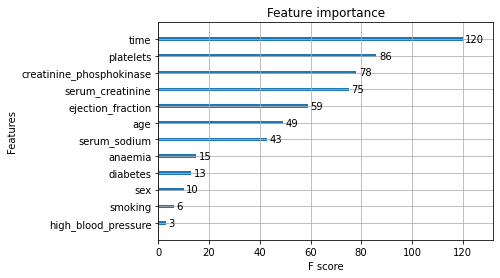

In [27]:
XGBmodel.fit(trainx,trainy)
plot_importance(XGBmodel)
plt.show()

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
params = {
    'learning_rate' : [0.01,0.02,0.03,0.04,0.05,0.1],
    'max_depth'     : [1,3,5,7,9],
    #'min_child_weight':[0,1,3],
    'gamma'         : [0.0,0.1,0.2,0.3,0.5],
    'colsample_bytree': [0.2,0.5,0.6,0.7,0.8,0.9],
    'reg_lambda'      :[10.0,20.0,30.0,40.0,100.0],
    'scale_pos_weight':[1,2,3,5,7],
    'seed':[10,20,30,40,50],
    'subsample':[0.6,0.7,0.8,0.9,1.0]
}

In [31]:
random_search = RandomizedSearchCV(XGBmodel,param_distributions = params, n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5,verbose = 3)

random_search.fit(trainx,trainy)
random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    6.0s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    6.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.9s finished
E:\Programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=10.0, scale_pos_weight=3, seed=30,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [32]:
random_search.best_params_

{'subsample': 0.6,
 'seed': 30,
 'scale_pos_weight': 3,
 'reg_lambda': 10.0,
 'max_depth': 3,
 'learning_rate': 0.03,
 'gamma': 0.0,
 'colsample_bytree': 0.6}

In [35]:
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=10.0, scale_pos_weight=3, seed=30,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)
score = cross_val_score(XGBmodel, trainx, trainy)

Xavg_score = score.mean()
print(Xavg_score)

E:\Programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [36]:
Xgbm = XGBClassifier()
Xgbm.fit(trainx, trainy)
Xpred = Xgbm.predict(testx1)
print(Xpred)

Xpreded_y = []
for values in Xpred:
  if values > 0.5:
    Xpreded_y.append(1)
  else:
    Xpreded_y.append(0)

submission = pd.DataFrame({'DEATH_EVENT': Xpreded_y})
submission1 = submission
submission1.to_csv("Ranveerkar_Shreyas_Suresh_predictions.csv", index=False)
submission1['DEATH_EVENT'].value_counts()
submission1.head()

[19:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [38]:
submission1.value_counts()

DEATH_EVENT
0              44
1              16
dtype: int64